# Assignment: Exploratory Data Analysis
### `! git clone https://github.com/DS3001/visualization`
### Do Q1 or Q2 or Q3, and Q4. You might want to refer to your work for the data wrangling assignment.

In [92]:
! git clone https://github.com/annagirerd/visualization


fatal: destination path 'visualization' already exists and is not an empty directory.


In [93]:
import pandas as pd

# Replace the URL with your GitHub raw CSV link
url = "https://raw.githubusercontent.com/annagirerd/visualization/refs/heads/main/assignment/data/college_completion.csv"

# Load the data from GitHub
df = pd.read_csv(url)

# View the first few rows
print(df.head())



   index  unitid                            chronname        city    state  \
0      0  100654               Alabama A&M University      Normal  Alabama   
1      1  100663  University of Alabama at Birmingham  Birmingham  Alabama   
2      2  100690                   Amridge University  Montgomery  Alabama   
3      3  100706  University of Alabama at Huntsville  Huntsville  Alabama   
4      4  100724             Alabama State University  Montgomery  Alabama   

    level                 control  \
0  4-year                  Public   
1  4-year                  Public   
2  4-year  Private not-for-profit   
3  4-year                  Public   
4  4-year                  Public   

                                               basic hbcu flagship  ...  \
0  Masters Colleges and Universities--larger prog...    X      NaN  ...   
1  Research Universities--very high research acti...  NaN      NaN  ...   
2            Baccalaureate Colleges--Arts & Sciences  NaN      NaN  ...   
3  Resea

**Q1.** This question provides some practice doing exploratory data analysis and visualization.

The "relevant" variables for this question are:
  - `level` - Level of institution (4-year, 2-year)
  - `aid_value` - The average amount of student aid going to undergraduate recipients
  - `control` - Public, Private not-for-profit, Private for-profit
  - `grad_100_value` - percentage of first-time, full-time, degree-seeking undergraduates who complete a degree or certificate program within 100 percent of expected time (bachelor's-seeking group at 4-year institutions)

1. Load the `./data/college_completion.csv` data with Pandas.
2. What are are the dimensions of the data? How many observations are there? What are the variables included? Use `.head()` to examine the first few rows of data.
3. Cross tabulate `control` and `level`. Describe the patterns you see.
4. For `grad_100_value`, create a histogram, kernel density plot, boxplot, and statistical description.
5. For `grad_100_value`, create a grouped kernel density plot by `control` and by `level`. Describe what you see. Use `groupby` and `.describe` to make grouped calculations of statistical descriptions of `grad_100_value` by `level` and `control`. Which institutions appear to have the best graduation rates?
6. Create a new variable, `df['levelXcontrol']=df['level']+', '+df['control']` that interacts level and control. Make a grouped kernel density plot. Which institutions appear to have the best graduation rates?
7. Make a kernel density plot of `aid_value`. Now group your graph by `level` and `control`. What explains the shape of the graph? Use `groupby` and `.describe` to make grouped calculations of statistical descriptions of `aid_value` by `level` and `control`.
8. Make a scatterplot of `grad_100_value` by `aid_value`. Describe what you see. Now make the same plot, grouping by `level` and then `control`. Describe what you see. For which kinds of institutions does aid seem to increase graduation rates?

In [94]:
print(df.shape, '\n') # List the dimensions of df


(3798, 63) 



In [95]:
print(df.dtypes, '\n') # The types of the variables; `object` is a bad sign
print(df.isna().sum()) # Check for missing values

index                int64
unitid               int64
chronname           object
city                object
state               object
                    ...   
state_sector_ct      int64
carnegie_ct          int64
counted_pct         object
nicknames           object
cohort_size        float64
Length: 63, dtype: object 

index                 0
unitid                0
chronname             0
city                  0
state                 0
                   ... 
state_sector_ct       0
carnegie_ct           0
counted_pct         426
nicknames          3488
cohort_size         331
Length: 63, dtype: int64


In [96]:
print(df.head())

   index  unitid                            chronname        city    state  \
0      0  100654               Alabama A&M University      Normal  Alabama   
1      1  100663  University of Alabama at Birmingham  Birmingham  Alabama   
2      2  100690                   Amridge University  Montgomery  Alabama   
3      3  100706  University of Alabama at Huntsville  Huntsville  Alabama   
4      4  100724             Alabama State University  Montgomery  Alabama   

    level                 control  \
0  4-year                  Public   
1  4-year                  Public   
2  4-year  Private not-for-profit   
3  4-year                  Public   
4  4-year                  Public   

                                               basic hbcu flagship  ...  \
0  Masters Colleges and Universities--larger prog...    X      NaN  ...   
1  Research Universities--very high research acti...  NaN      NaN  ...   
2            Baccalaureate Colleges--Arts & Sciences  NaN      NaN  ...   
3  Resea

In [97]:
#unstacking data
print(pd.crosstab(df['control'],df['level']),'\n')
print(pd.crosstab(df['control'],df['level'], normalize = 'all'),'\n')


level                   2-year  4-year
control                               
Private for-profit         465     527
Private not-for-profit      68    1180
Public                     926     632 

level                     2-year    4-year
control                                   
Private for-profit      0.122433  0.138757
Private not-for-profit  0.017904  0.310690
Public                  0.243813  0.166403 



I see that the vast majority of private not-for-private colleges are 4-year colleges. for private-for colleges, the spread is more even. Finally, public colleges have a majority 2-year colleges. I didn't realize that there were so many 2-year colleges to begin with.

count    3467.000000
mean       28.364465
std        23.312730
min         0.000000
25%         9.000000
50%        22.500000
75%        43.650000
max       100.000000
Name: grad_100_value, dtype: float64


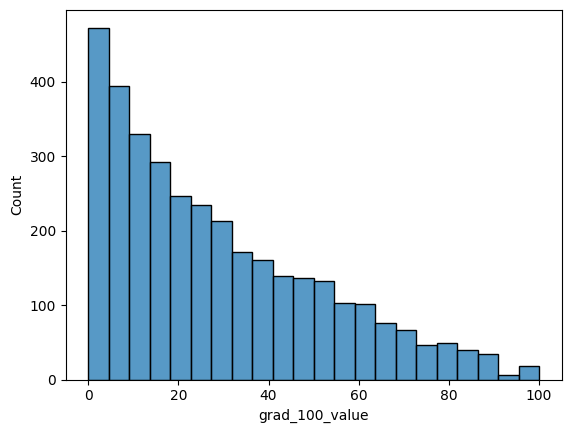

In [98]:
import seaborn as sns
sns.histplot(df['grad_100_value'])
print(df['grad_100_value'].describe())


<Axes: xlabel='grad_100_value', ylabel='Density'>

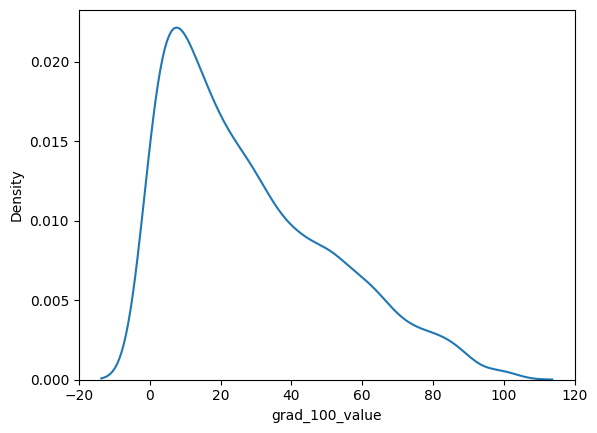

In [99]:
sns.kdeplot(df['grad_100_value'])

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


<Axes: ylabel='grad_100_value'>

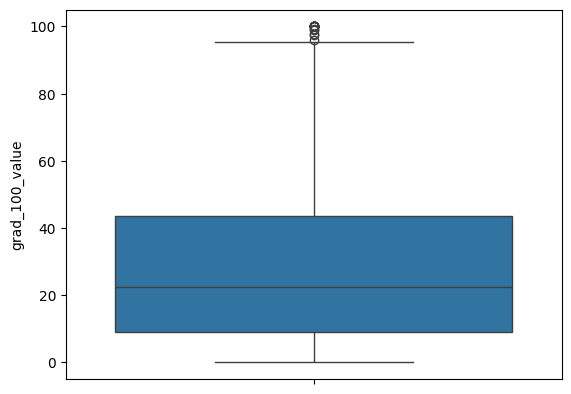

In [100]:
sns.boxplot(df['grad_100_value'])

In [101]:
df['grad_100_value'].describe()

,grad_100_value
count,3467.000000
mean,28.364465
std,23.312730
min,0.000000
25%,9.000000
50%,22.500000
75%,43.650000
max,100.000000


5. For `grad_100_value`, create a grouped kernel density plot by `control` and by `level`. Describe what you see. Use `groupby` and `.describe` to make grouped calculations of statistical descriptions of `grad_100_value` by `level` and `control`. Which institutions appear to have the best graduation rates?


/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


<Axes: xlabel='grad_100_value', ylabel='Density'>

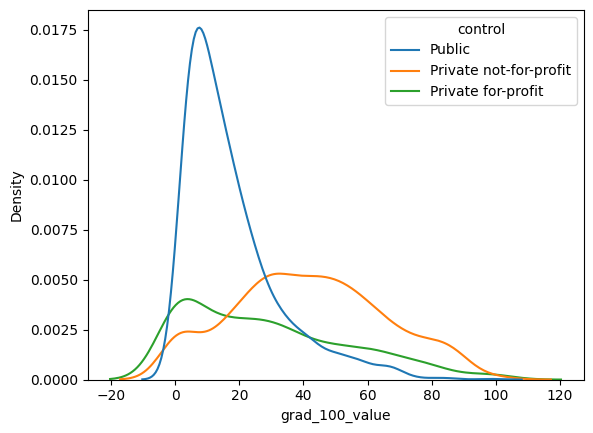

In [102]:
sns.kdeplot(data=df,x='grad_100_value',hue='control')

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


<Axes: xlabel='grad_100_value', ylabel='Density'>

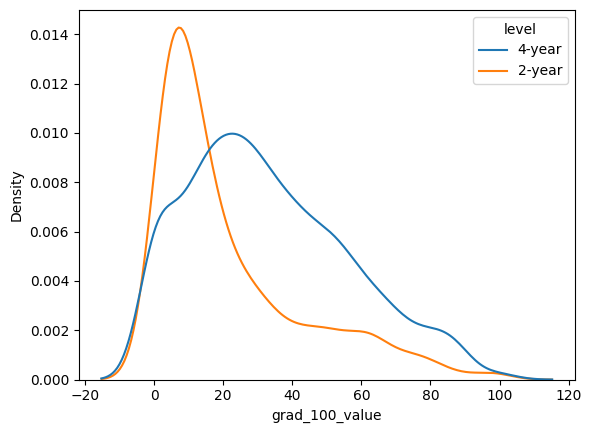

In [103]:
sns.kdeplot(data=df,x='grad_100_value',hue='level')

5. It looks as if private not-for-profit schools have the highest graduation rate, while public schools have the lowest graduation rate.

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


<Axes: xlabel='grad_100_value', ylabel='Density'>

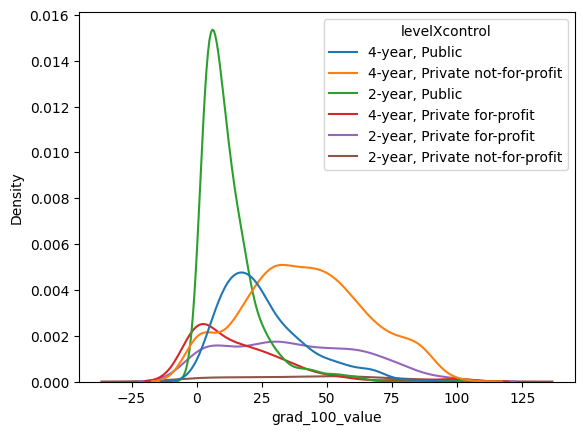

In [105]:
df['levelXcontrol']=df['level']+', '+df['control']
sns.kdeplot(data=df,x='grad_100_value',hue='levelXcontrol')

6. It's hard to tell, but it appears that either 4-year, private not-for-profit unversities or 2-year, private for-profit universities have the highest graduation rate.

In [106]:
print(df['aid_value'].dtype)


float64


In [107]:
grouped = df.groupby(['level', 'control'])['aid_value']


In [108]:
grouped.describe()


count          mean          std     min  \
level  control                                                             
2-year Private for-profit       464.0   4559.681034  1286.688269   294.0   
       Private not-for-profit    68.0   5128.058824  2590.449946   934.0   
       Public                   926.0   4126.199784  1260.271382   881.0   
4-year Private for-profit       527.0   4696.062619  1489.410020  1580.0   
       Private not-for-profit  1180.0  14702.401695  7649.775203   902.0   
       Public                   632.0   6514.071203  2353.716693  2232.0   

                                   25%      50%       75%      max  
level  control                                                      
2-year Private for-profit      3818.75   4286.5   5122.00   9727.0  
       Private not-for-profit  3650.00   4516.5   6311.50  13654.0  
       Public                  3311.25   3943.5   4762.00   9809.0  
4-year Private for-profit      3885.50   4364.0   5131.50  18355.0  
       Private not-for-profit  9113.25  13774.5  18996.75  41580.0  
       Public                  4990.50   6085.0   7341.50  17299.0

<Axes: xlabel='aid_value', ylabel='Density'>

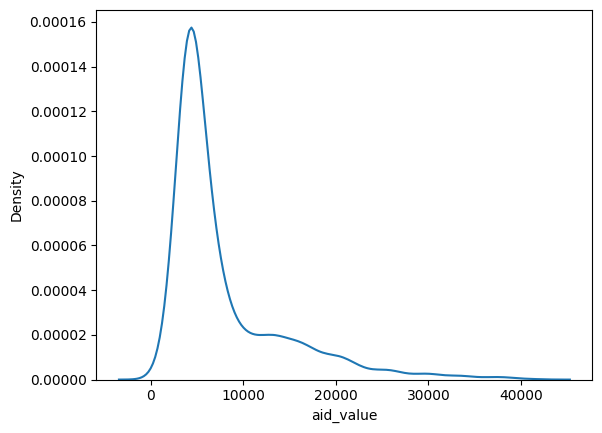

In [109]:
sns.kdeplot(data=df,x='aid_value') # Here it is in levels, with a barely noticeable second mode around $11k


/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


<Axes: xlabel='aid_value', ylabel='Density'>

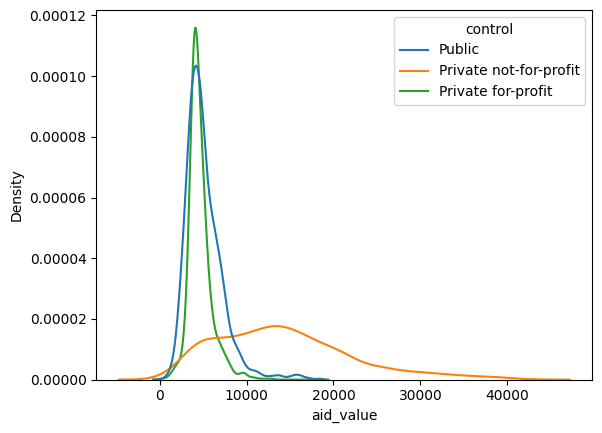

In [110]:
sns.kdeplot(data=df,x='aid_value',hue='control')

This shows that public and private for-profit schools do not give as much in terms of aid value in comparison to private not-for-profit schools. Does the kernel density plot work like a calculus integral more or less? I'm wondering if the area under each curve explains the amount of aid packages given because it could be that private not-for profit schools and public/private for-profit schools give the same amount of aid packages, but private NFP having more substantial valued packages.

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


<Axes: xlabel='aid_value', ylabel='Density'>

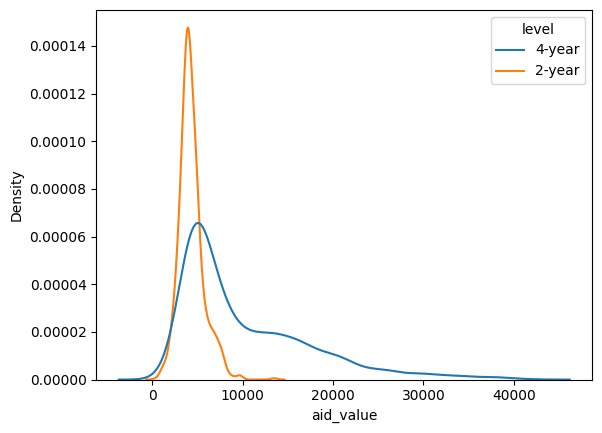

In [111]:
sns.kdeplot(data=df,x='aid_value',hue='level')

the graph shows that 2-year colleges dont give as highly values aid packages as do 4-year colleges. I have the same question about the overall number of packages given out by each type of institutions in relation to the kernel density plot.:

In [112]:
df.loc[:,['control','aid_value']].groupby('control').describe()

aid_value                                             \
                           count          mean          std    min      25%   
control                                                                       
Private for-profit         991.0   4632.206862  1399.121259  294.0  3861.50   
Private not-for-profit    1248.0  14180.722756  7772.700998  902.0  8325.00   
Public                    1558.0   5094.835687  2136.436370  881.0  3725.25   

                                                   
                            50%      75%      max  
control                                            
Private for-profit       4331.0   5131.5  18355.0  
Private not-for-profit  13322.0  18571.0  41580.0  
Public                   4667.0   6087.5  17299.0

In [113]:
df.loc[:,['level','aid_value']].groupby('level').describe()

aid_value                                                             \
           count          mean          std    min     25%     50%      75%   
level                                                                         
2-year    1458.0   4310.878601  1384.045631  294.0  3485.5  4113.0   4890.0   
4-year    2339.0  10235.379222  7227.369167  902.0  4830.5  7222.0  14046.0   

                 
            max  
level            
2-year  13654.0  
4-year  41580.0

<Axes: xlabel='aid_value', ylabel='grad_100_value'>

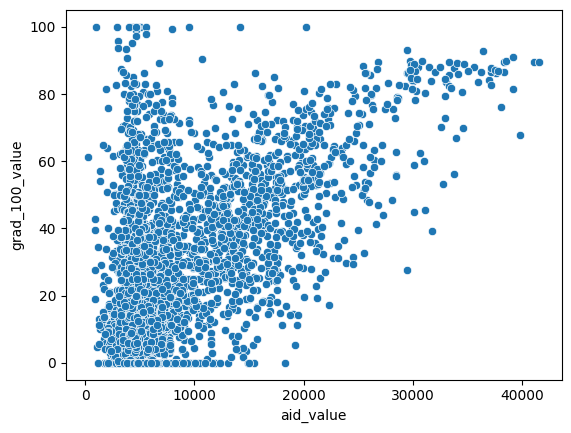

In [114]:
sns.scatterplot(data=df,x='aid_value',y='grad_100_value')

There is a cluster with a relatively positive correlation between aid value and gradution rate, and another with less of a relationship.

<Axes: xlabel='aid_value', ylabel='grad_100_value'>

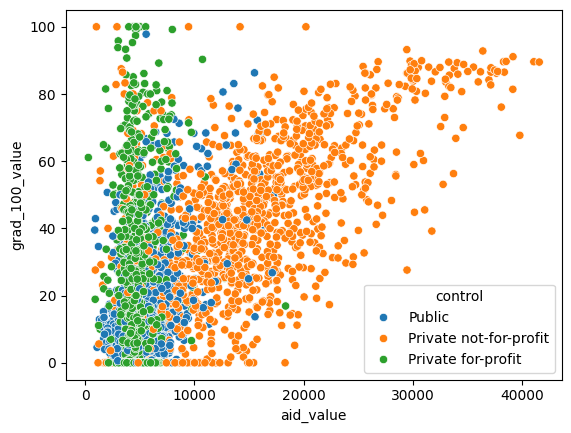

In [115]:
sns.scatterplot(data=df,x='aid_value',y='grad_100_value',hue='control')

It seems the cluster I mentioned above that has the relatively positive correlation is the private not-for-profit schools and public and private for-profit schools are relatively the same with not much of a relationship between the two variables.

<Axes: xlabel='aid_value', ylabel='grad_100_value'>

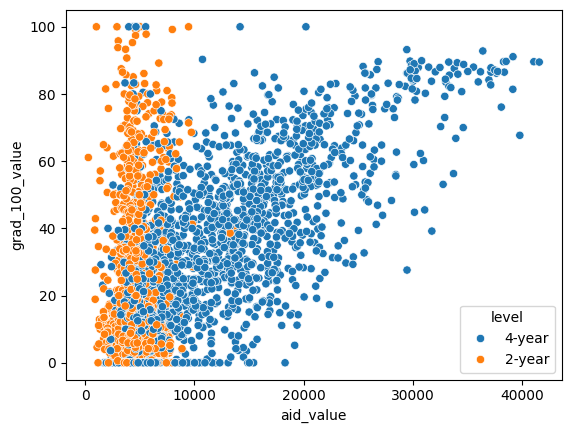

In [116]:
sns.scatterplot(data=df,x='aid_value',y='grad_100_value',hue='level')

The positive correlation is not as strong compared to the "control" groupings, but the 4-year colleges have a positive correlation between grad rate and aid value and the 2-year colleges do not.

<Axes: xlabel='aid_value', ylabel='grad_100_value'>

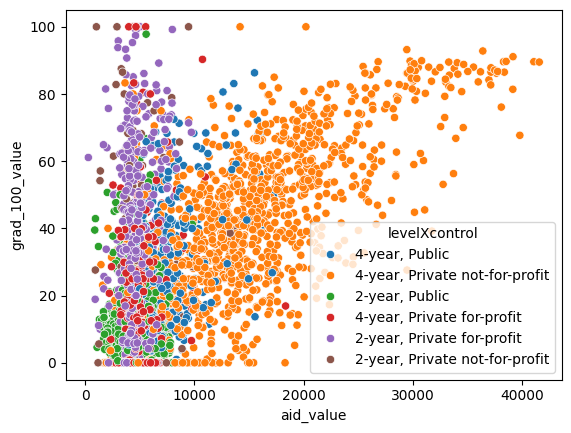

In [117]:
sns.scatterplot(data=df,x='aid_value',y='grad_100_value',hue='levelXcontrol')

The positive correlation is almost exclusively with 4year Private NFP colleges with some public 4y colleges. 2y Public schools, 4y Private FP, 2y private FP, and 2y private NFP (this one just doesnt have a lot of data) do not have strong postive correlations. My guess would be (to explain some of this) public 2y colleges focus on associate degrees and workforce training, so a lot of students do not enroll with the goal of completing a degree in mind but rather seek skills for work.

**Q2.** This question uses the Airbnb data to practice making visualizations.

  1. Load the `./data/airbnb_hw.csv` data with Pandas. You should have cleaned the `Price` variable in question 2, and you'll need it later for this question.
  2. What are are the dimensions of the data? How many observations are there? What are the variables included? Use `.head()` to examine the first few rows of data.
  3. Cross tabulate `Room Type` and `Property Type`. What patterns do you see in what kinds of rentals are available? For which kinds of properties are private rooms more common than renting the entire property?
  4. For `Price`, make a histogram, kernel density, box plot, and a statistical description of the variable. Are the data badly scaled? Are there many outliers? Use `log` to transform price into a new variable, `price_log`, and take these steps again.
  5. Make a scatterplot of `price_log` and `Beds`. Describe what you see. Use `.groupby()` to compute a desciption of `Price` conditional on/grouped by the number of beds. Describe any patterns you see in the average price and standard deviation in prices.
  6. Make a scatterplot of `price_log` and `Beds`, but color the graph by `Room Type` and `Property Type`. What patterns do you see? Compute a description of `Price` conditional on `Room Type` and `Property Type`. Which Room Type and Property Type have the highest prices on average? Which have the highest standard deviation? Does the mean or median appear to be a more reliable estimate of central tendency, and explain why?
  7. We've looked a bit at this `price_log` and `Beds` scatterplot. Use seaborn to make a `jointplot` with `kind=hex`. Where are the data actually distributed? How does it affect the way you think about the plots in 5 and 6?

**Q3.** Open the `./data/CBO_data.pdf` file. This contains tax data for 2019, explaining where the money comes from that the U.S. Federal Government Spends in terms of taxation on individuals/families and payroll taxes (the amount that your employer pays in taxes on your wages).

For some context, the Federal government ultimately spent about $4.4 trillion in 2019, which was 21% of GDP (the total monetary value of all goods and services produced within the United States). Individual Income Taxes is the amount individuals pay on their wages to the Federal government, Corporate Income Taxes is the taxes individuals pay on capital gains from investment when they sell stock or other financial instruments, Payroll Taxes is the tax your employer pays on your wages, Excises and Customs Duties are taxes on goods or services like sin taxes on cigarettes or alcohol, and Estate and Gift Taxes are taxes paid on transfers of wealth to other people.

1. Get the Millions of Families and Billions of Dollars data into a .csv file and load it with Pandas.
2. Create a bar plot of individual income taxes by income decile. Explain what the graph shows. Why are some values negative?
3. Create a bar plot of Total Federal Taxes by income decile. Which deciles are paying net positive amounts, and which are paying net negative amounts?
4. Create a stacked bar plot for which Total Federal Taxes is grouped by Individual Income Taxes, Payroll Taxes, Excises and Customs Duties, and Estate and Gift Taxes. How does the share of taxes paid vary across the adjusted income deciles? (Hint: Are these the kind of data you want to melt?)
5. Below the Total line for Millions of Families and Billions of Dollars, there are data for the richest of the richest families. Plot this alongside the bars for the deciles above the Total line. Describe your results.
6. Get the Percent Distribution data into a .csv file and load it with Pandas. Create a bar graph of Total Federal Taxes by income decile.
7. A tax system is progressive if higher-income and wealthier individuals pay more than lower-income and less wealthy individuals, and it is regressive if the opposite is true. Is the U.S. tax system progressive in terms of amount paid? In terms of the percentage of the overall total?
8. Do the rich pay enough in taxes? Defend your answer.

**Q4.** Go to https://data.cms.gov/search.
1. Pick a dataset about something you are interested in. Download the data and data dictionary. If you really can't decide, you can always use this one: https://data.cms.gov/medicare-current-beneficiary-survey-mcbs/medicare-current-beneficiary-survey-data
3. Does the data dictionary document how missings are handled? For categorical variables, does it describe the possible values and missing value codes? For the numeric variables, does it describe how missing values are handled? Summarize your opinion of the data dictionary.
4. Pick out a few interesting variables, and explain why you find them jointly interesting. Clean those variables, documenting your choices by commenting in the code or in a markdown chunk in a notebook.
5. For the variables you select, make a boxplot for each numeric variable and a bar graph for each categorical variable. Do you see any outliers?
6. Create a histogram or kernel density plot, and explain what you see. Do the results require any transformations to rescale them?
7. Create a scatter plot, and describe the relationship you see.
8. Create a table (cross tabulation, variance-covariance, or a `.describe()` five-number summary), and explain what you see.

So... for this part i did the whole thing and then forgot to save it (stupid) so i had to redo it and used chat gpt.

The code book does not clarify how to handle missings for netiher catergorical nor numeric. I think the data dictionary could be better explained for people who don't know much about health care like me. I had to look up a few terms. It also doesn't explain much aside from the titles of the variables so it could be more detailed about missings etc.

- Selected variables:
  - LA_Opioid_Prscrbng_Rate= Long-Acting Opioid Prescribing Rate
  - Opioid_Prscrbng_Rate = Opioid Prescribing Rate
  - Geo_Lvl =  Geographic Level = Data aggregated at the National level are identified by "National". Data aggregated at the State level list the state associated with the beneficiary. The values include the 50 United States and the District of Columbia. For the county-level data, the state name and county name associated with the beneficiary. For the ZIP code-level data, the state name associated with the beneficiary.

In [73]:
from google.colab import files
import pandas as pd

# Step 2: Upload the CSV file
uploaded = files.upload()



Saving omt_mdcd_r24_p02_v10_ytd22_geo.csv to omt_mdcd_r24_p02_v10_ytd22_geo (1).csv


In [74]:

filename = list(uploaded.keys())[0]
df = pd.read_csv('omt_mdcd_r24_p02_v10_ytd22_geo.csv')

# Step 4: Display the first few rows of the dataframe to verify the upload
df.head()

<ipython-input-74-c7432c429426>:2: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('omt_mdcd_r24_p02_v10_ytd22_geo.csv')


,Year,Geo_Lvl,Geo_Cd,Geo_Desc,Plan_Type,Tot_Opioid_Clms,Tot_Clms,Opioid_Prscrbng_Rate,Opioid_Prscrbng_Rate_5Y_Chg,Opioid_Prscrbng_Rate_1Y_Chg,LA_Tot_Opioid_Clms,LA_Opioid_Prscrbng_Rate,LA_Opioid_Prscrbng_Rate_5Y_Chg,LA_Opioid_Prscrbng_Rate_1Y_Chg
0,2013,National,,National,All,33471552.0,506882862.0,6.60,NaN,NaN,2605496.0,7.78,NaN,NaN
1,2013,National,,National,FFS,15528221.0,240661427.0,6.45,NaN,NaN,1363671.0,8.78,NaN,NaN
2,2013,National,,National,MC,17943331.0,266221435.0,6.74,NaN,NaN,1241825.0,6.92,NaN,NaN
3,2013,State,56,Wyoming,All,41202.0,529696.0,7.78,NaN,NaN,4230.0,10.27,NaN,NaN
4,2013,State,38,North Dakota,All,39906.0,588978.0,6.78,NaN,NaN,3472.0,8.70,NaN,NaN


In [75]:

df_clean = df.dropna(subset=['Opioid_Prscrbng_Rate', 'LA_Opioid_Prscrbng_Rate'])
df_clean.loc[:, 'Plan_Type'] = df_clean['Plan_Type'].fillna('Unknown')
df_clean.loc[:, 'Geo_Lvl'] = df_clean['Geo_Lvl'].astype('category')
df_clean.loc[:, 'Plan_Type'] = df_clean['Plan_Type'].astype('category')

print(df_clean)

# Summarize the cleaned data to observe trends
summary = df_clean.groupby(['Geo_Lvl', 'Plan_Type'])[['Opioid_Prscrbng_Rate', 'LA_Opioid_Prscrbng_Rate']].mean()
print(summary)

        Year   Geo_Lvl Geo_Cd      Geo_Desc Plan_Type  Tot_Opioid_Clms  \
0       2013  National             National       All       33471552.0   
1       2013  National             National       FFS       15528221.0   
2       2013  National             National        MC       17943331.0   
3       2013     State     56       Wyoming       All          41202.0   
4       2013     State     38  North Dakota       All          39906.0   
...      ...       ...    ...           ...       ...              ...   
462622  2022     State     12       Florida       All         613052.0   
462623  2022     State     48         Texas       All         557832.0   
462624  2022     State     39          Ohio       All         836795.0   
462625  2022     State     36      New York       All         878492.0   
462626  2022     State     06    California       All        2041196.0   

           Tot_Clms  Opioid_Prscrbng_Rate  Opioid_Prscrbng_Rate_5Y_Chg  \
0       506882862.0                  

In [76]:
# Assuming df_clean is your cleaned DataFrame

# Get summary statistics for the two opioid rate variables
summary_stats = df_clean[['Opioid_Prscrbng_Rate', 'LA_Opioid_Prscrbng_Rate']].describe()

# Display the summary statistics
print(summary_stats)

       Opioid_Prscrbng_Rate  LA_Opioid_Prscrbng_Rate
count         199736.000000            199736.000000
mean               3.969451                 6.976747
std                2.936996                 9.191974
min                0.020000                 0.000000
25%                2.190000                 0.000000
50%                3.460000                 4.670000
75%                5.070000                 9.920000
max              100.000000               100.000000


Opioids prescribing rate is The number of Opioid Claims divided by the Overall Claims and multiplied by 100. LA opioid prescribing rate is The number of Long-Acting Opioid Claims divided by the Opioid Claims and multiplied by 100. While both rates are relatively low (below 10%), it makes sense that long acting opioids would be more prescirbed by doctors than regular opioids as they are slowly released in the bloodstream, which mitigates risk associated with such addictive drugs.

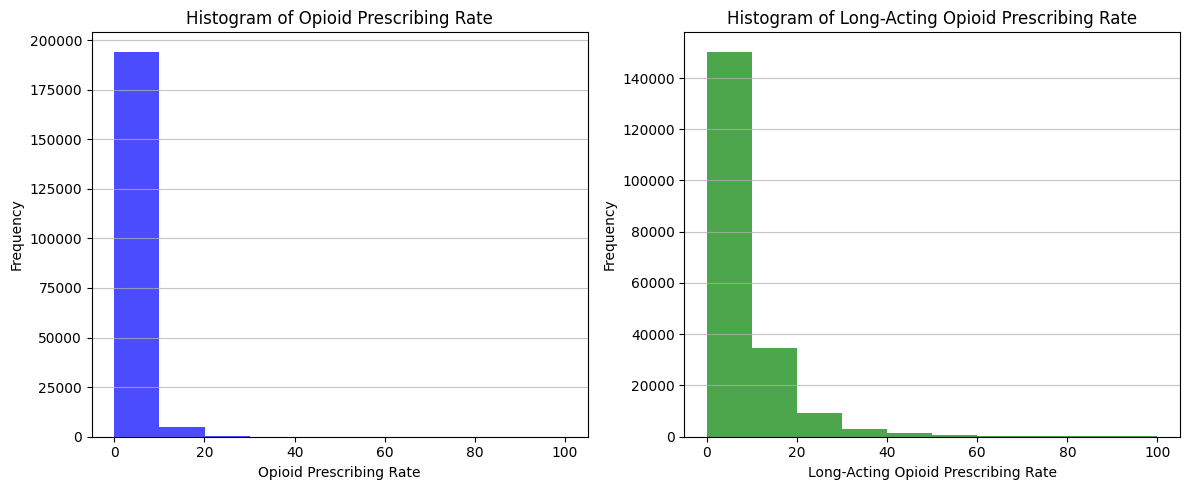

In [77]:
import matplotlib.pyplot as plt

# Set up the figure and axes
plt.figure(figsize=(12, 5))

# Histogram for Opioid_Prscrbng_Rate
plt.subplot(1, 2, 1)  # 1 row, 2 columns, 1st subplot
plt.hist(df_clean['Opioid_Prscrbng_Rate'], bins=10, color='blue', alpha=0.7)
plt.title('Histogram of Opioid Prescribing Rate')
plt.xlabel('Opioid Prescribing Rate')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)

# Histogram for LA_Opioid_Prscrbng_Rate
plt.subplot(1, 2, 2)  # 1 row, 2 columns, 2nd subplot
plt.hist(df_clean['LA_Opioid_Prscrbng_Rate'], bins=10, color='green', alpha=0.7)
plt.title('Histogram of Long-Acting Opioid Prescribing Rate')
plt.xlabel('Long-Acting Opioid Prescribing Rate')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)

# Adjust layout and show the plots
plt.tight_layout()
plt.show()

These histograms show more of a right skew for opiod prescribing rates compared to LA opioid prescribing rates. I;m going to make some boxplots to dive deeper into the vairability of each of these variables because it looks as if LA opioids rate has more variability than opioid presecribing rate.

<ipython-input-78-4196306ac1e5>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_melted, x='Rate Type', y='Rate Value', palette='Set2')
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get

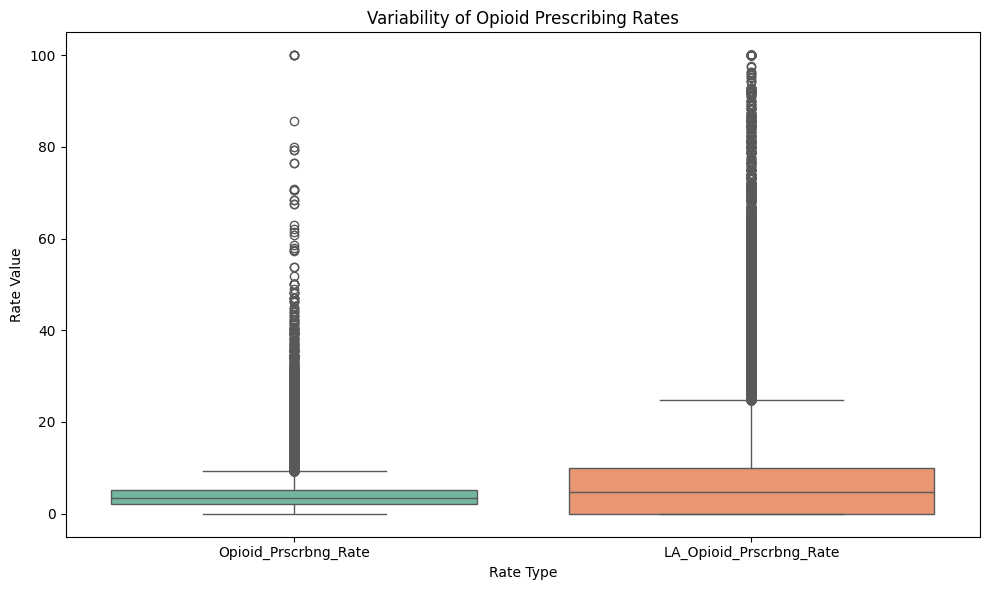

In [78]:
import seaborn as sns
import matplotlib.pyplot as plt

# Combine the two variables into a long-format DataFrame for better plotting
df_melted = df_clean.melt(value_vars=['Opioid_Prscrbng_Rate', 'LA_Opioid_Prscrbng_Rate'],
                           var_name='Rate Type', value_name='Rate Value')

# Set up the plot
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_melted, x='Rate Type', y='Rate Value', palette='Set2')

# Add titles and labels
plt.title('Variability of Opioid Prescribing Rates')
plt.xlabel('Rate Type')
plt.ylabel('Rate Value')

plt.tight_layout()
plt.show()

Yes- LA opioid rate has more variability than opioid rate. Each of these seem to have a lot of outliers though, so I'm going to clean that up.

In [79]:
def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# Remove outliers for both opioid rate variables
df_clean_no_outliers = remove_outliers_iqr(df_clean, 'Opioid_Prscrbng_Rate')
df_clean_no_outliers = remove_outliers_iqr(df_clean_no_outliers, 'LA_Opioid_Prscrbng_Rate')

# Display the cleaned DataFrame without outliers
print(df_clean_no_outliers)

        Year   Geo_Lvl Geo_Cd      Geo_Desc Plan_Type  Tot_Opioid_Clms  \
0       2013  National             National       All       33471552.0   
1       2013  National             National       FFS       15528221.0   
2       2013  National             National        MC       17943331.0   
3       2013     State     56       Wyoming       All          41202.0   
4       2013     State     38  North Dakota       All          39906.0   
...      ...       ...    ...           ...       ...              ...   
462622  2022     State     12       Florida       All         613052.0   
462623  2022     State     48         Texas       All         557832.0   
462624  2022     State     39          Ohio       All         836795.0   
462625  2022     State     36      New York       All         878492.0   
462626  2022     State     06    California       All        2041196.0   

           Tot_Clms  Opioid_Prscrbng_Rate  Opioid_Prscrbng_Rate_5Y_Chg  \
0       506882862.0                  

<ipython-input-80-ccaa331827d0>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_melted_no_outliers, x='Rate Type', y='Rate Value', palette='Set2')
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 t

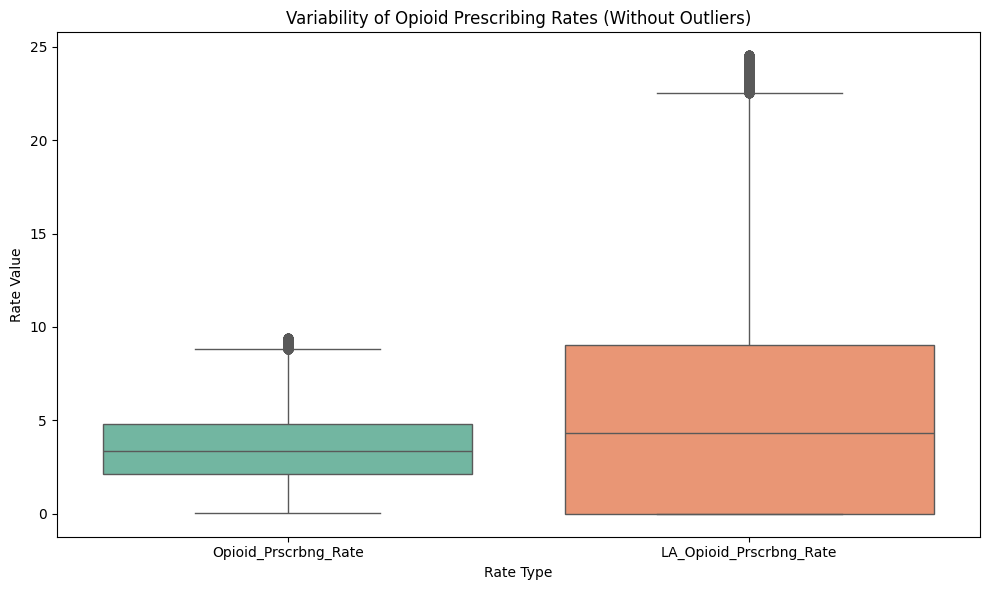

In [80]:
# Melt the cleaned DataFrame without outliers
df_melted_no_outliers = df_clean_no_outliers.melt(value_vars=['Opioid_Prscrbng_Rate', 'LA_Opioid_Prscrbng_Rate'],
                                                   var_name='Rate Type', value_name='Rate Value')

# Set up the plot
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_melted_no_outliers, x='Rate Type', y='Rate Value', palette='Set2')

# Add titles and labels
plt.title('Variability of Opioid Prescribing Rates (Without Outliers)')
plt.xlabel('Rate Type')
plt.ylabel('Rate Value')

plt.tight_layout()

this looks much better without as many outliers


<ipython-input-81-581b3863a3a8>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_clean, x='Geo_Lvl', y='Opioid_Prscrbng_Rate', palette='Set2')
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple 

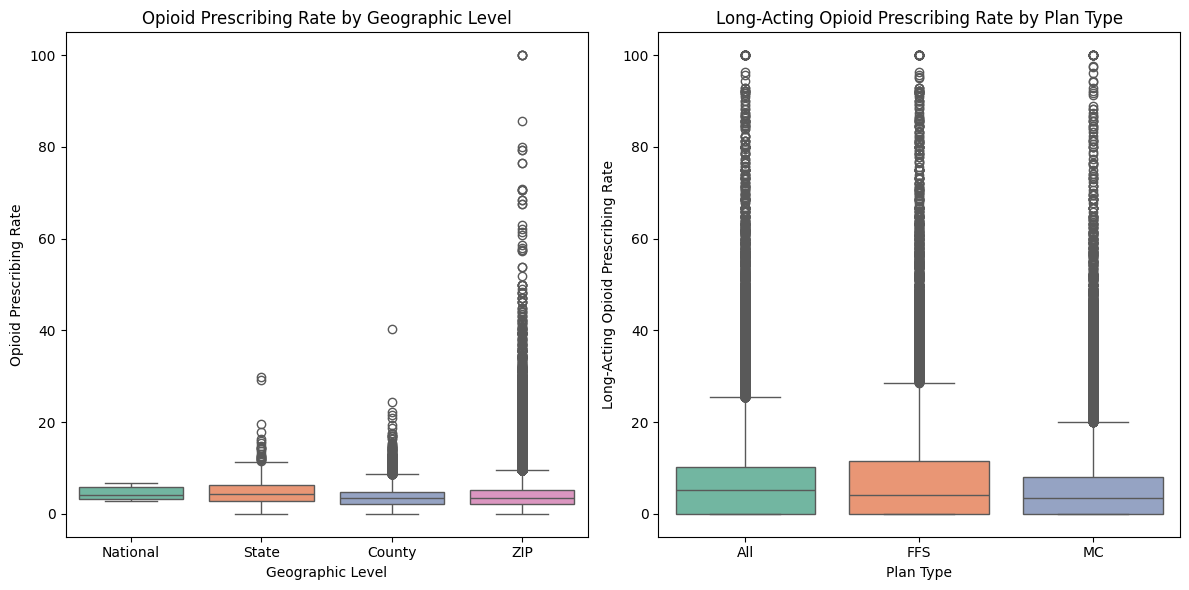

In [81]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set up the figure size
plt.figure(figsize=(12, 6))

# Box plot for Opioid_Prscrbng_Rate by Geo_Lvl
plt.subplot(1, 2, 1)
sns.boxplot(data=df_clean, x='Geo_Lvl', y='Opioid_Prscrbng_Rate', palette='Set2')
plt.title('Opioid Prescribing Rate by Geographic Level')
plt.xlabel('Geographic Level')
plt.ylabel('Opioid Prescribing Rate')

# Box plot for LA_Opioid_Prscrbng_Rate by Plan_Type
plt.subplot(1, 2, 2)
sns.boxplot(data=df_clean, x='Plan_Type', y='LA_Opioid_Prscrbng_Rate', palette='Set2')
plt.title('Long-Acting Opioid Prescribing Rate by Plan Type')
plt.xlabel('Plan Type')
plt.ylabel('Long-Acting Opioid Prescribing Rate')

# Adjust layout and show the plots
plt.tight_layout()
plt.show()

Honestly this doesn't show me much. They all look about even

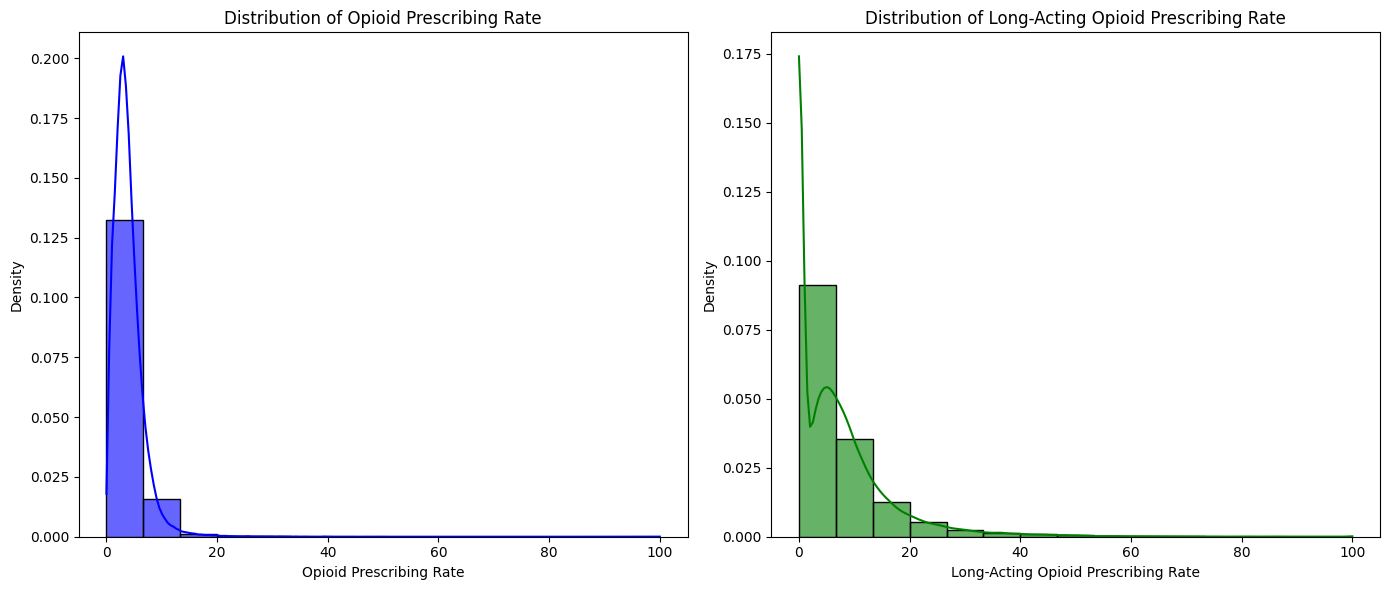

In [82]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set up the figure
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.histplot(df_clean['Opioid_Prscrbng_Rate'], bins=15, kde=True, color='blue', stat='density', alpha=0.6)
plt.title('Distribution of Opioid Prescribing Rate')
plt.xlabel('Opioid Prescribing Rate')
plt.ylabel('Density')

plt.subplot(1, 2, 2)
sns.histplot(df_clean['LA_Opioid_Prscrbng_Rate'], bins=15, kde=True, color='green', stat='density', alpha=0.6)
plt.title('Distribution of Long-Acting Opioid Prescribing Rate')
plt.xlabel('Long-Acting Opioid Prescribing Rate')
plt.ylabel('Density')

plt.tight_layout()
plt.show()

Both graphs show a right skew with the opioid prescribing rate histogram being more aggresively skewed. a log transformation can help the right skewness by compressing the higher values.

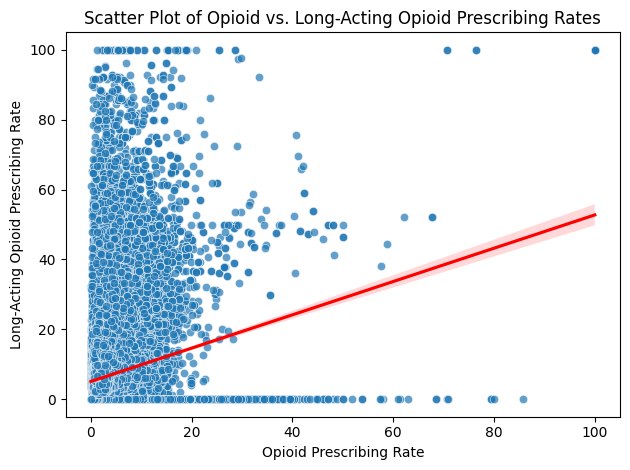

In [83]:

sns.scatterplot(data=df_clean, x='Opioid_Prscrbng_Rate', y='LA_Opioid_Prscrbng_Rate', alpha=0.7)

sns.regplot(data=df_clean, x='Opioid_Prscrbng_Rate', y='LA_Opioid_Prscrbng_Rate', scatter=False, color='red')

plt.title('Scatter Plot of Opioid vs. Long-Acting Opioid Prescribing Rates')
plt.xlabel('Opioid Prescribing Rate')
plt.ylabel('Long-Acting Opioid Prescribing Rate')

plt.tight_layout()
plt.show()

Although there is a slight positive correlation, most points do not cluster tightly around the regression model, suggesting the relationship is not strong. I don't think the outliers are influencing this trend as much as the zeros along the x axis are. This suggests that there are a lot of 0% for LA opiod rates.

In [88]:
cross_tab = pd.crosstab(df_clean['Geo_Lvl'],
                         df_clean['Opioid_Prscrbng_Rate'].apply(lambda x: pd.cut([x], bins=[0, 10, 20, 30, 40], labels=['0-10', '10-20', '20-30', '30-40'])).values[0],
                         dropna=False)

print(cross_tab)


col_0       0-10  10-20  20-30  30-40
Geo_Lvl                              
County     24694      0      0      0
National      30      0      0      0
State       1327      0      0      0
ZIP       173685      0      0      0


After binning the opioid prescription rate into 10% increments, it is apparent that most of the observations are zip code geography level, meaning the data is more granular by location whicih can help identify specific areas with high or low prescribing rates. It also shows, by no surprise, that most of the observations have relatively low prescribing rates. I think it could be cool to create heat maps to visualize opioid prescribing rates geographically.

In [90]:
cov_matrix = df_clean[['Opioid_Prscrbng_Rate', 'LA_Opioid_Prscrbng_Rate']].cov()

print(cov_matrix)

                         Opioid_Prscrbng_Rate  LA_Opioid_Prscrbng_Rate
Opioid_Prscrbng_Rate                 8.625944                 4.111683
LA_Opioid_Prscrbng_Rate              4.111683                84.492385


In [91]:
five_num_summary = df_clean[['Opioid_Prscrbng_Rate', 'LA_Opioid_Prscrbng_Rate']].describe()

print(five_num_summary)

       Opioid_Prscrbng_Rate  LA_Opioid_Prscrbng_Rate
count         199736.000000            199736.000000
mean               3.969451                 6.976747
std                2.936996                 9.191974
min                0.020000                 0.000000
25%                2.190000                 0.000000
50%                3.460000                 4.670000
75%                5.070000                 9.920000
max              100.000000               100.000000
